#3 Types of Recommender Systems

<u>**Urdu:**</u>

**Content Based:** Recommends content on the basis of similarity. Tags create karte hain aur unki basis pe recommendation hoti ha

**Collaborative Filtering:** Users ki similarity ki basis pe movies recommend karta ha. For example, 2 users hain, unko same movie achi lagi. Abb user A ne ek aur movie dekhi, recommender system wohi movie user B ko bhi recommend kardega since donon users ki choice similar ha. Eg. Facebook Newsfeed

**Hybrid:** Upar waali donon approaches ko combine kardeta ha.

We will be using content based approach in this project.

<u>**English:**</u>

**Content-Based:** Recommends content based on similarity. Tags are created, and recommendations are made based on them.

**Collaborative Filtering:** Recommends movies based on the similarity of users. For example, if two users liked the same movie, and user A watches another movie, the recommender system will suggest that movie to user B as well, since both users have similar preferences. Example: Facebook Newsfeed.

**Hybrid:** Combines the above two approaches. 

In this project, we will be using the content-based approach.




#Process Flow

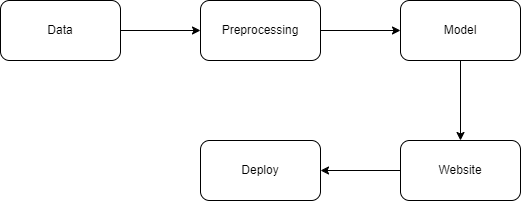

#Info about Data

<u>**Urdu**</u>
Using **TMDB 5000 Movies Dataset**. There are two datasets:

*Movies:* Is main different different cheezain hain like budget, genre, id, keywords, etc.

*Credits:* Is main cast or crew hain

<u>**English**</u>

Using the **TMDB 5000 Movies Dataset**. There are two datasets:

**Movies:** This dataset contains various attributes such as budget, genre, ID, keywords, etc.

**Credits:** This dataset includes information about the cast and crew.




In [ ]:
import numpy as np
import pandas as pd


In [ ]:
movies = pd.read_csv("/content/tmdb_5000_movies.csv")
credits = pd.read_csv("/content/tmdb_5000_credits.csv")

In [ ]:
movies.head()

In [ ]:
credits.head()

In [ ]:
#first movie k cast main kia kia ha
credits.head(1)["cast"].values

In [ ]:
credits.head()

In [ ]:
#Combining both the dataframes
#Merging both on the basis of title

movies = movies.merge(credits, on = "title")

In [ ]:
movies["original_language"].value_counts()

**List of Columns to keep**



1.   genres
2.   movie_id (Movie k posters fetch karne honge jiske liye id kaam ayegi)
3.   keywords
4.   overview
5.   title
6.   cast
7.   crew

Iske ilawa jo columns hain unko bhi use kia jaa sakta ha. Iss youtube video k liye remove kia ha



In [ ]:
movies = movies[["movie_id", "title", "overview", "genres", "keywords", "cast", "crew"]]

In [ ]:
movies.head()

We'll make a new dataframe now which will include *movie_id*, *title*, and *tags*. We'll make the *tags* column combining *overview*, *genres*, *keywords*, *cast*, and *crew*

In [ ]:
#Checking for missing data

movies.isnull().sum()

In [ ]:
movies.dropna(inplace = True)

In [ ]:
#Checking for duplicated data

movies.duplicated().sum()

In [ ]:
movies.iloc[0].genres

In [ ]:
#Yeh jo upar genres dictionary format main aaye hain, hamen isko ek list main
#convert karna ha

In [ ]:
# def convert(obj):
#   L = []
#   for i in obj:
#     L.append(i["name"])
#   return L


In [ ]:
# convert([{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}])

In [ ]:
#Youtuber k paas uper waale functionse kaam nahi hua tha to uss ne yeh ast or
#literal_eval use kia tha

import ast
def convert(obj):
  L = []
  for i in ast.literal_eval(obj):
    L.append(i["name"])
  return L

In [ ]:
movies["genres"] = movies["genres"].apply(convert)

In [ ]:
movies.head()

In [ ]:
movies["keywords"] = movies["keywords"].apply(convert)

In [ ]:
movies.head()

In [ ]:
movies["cast"].head(1).values

In [ ]:
def convert3(text):
  L = []
  counter = 0
  for i in ast.literal_eval(text):
    if counter != 3:
      L.append(i["name"])
      counter += 1
    else:
      break
  return L

In [ ]:
movies["cast"] = movies["cast"].apply(convert3)

In [ ]:
movies.head()

In [ ]:
movies["crew"].head(1).values

<u>**Urdu:**</u>

Abb hamen crew ki itni saari dictionaries main se sirf wo dictionary chahiye jahan *job* ki value *director* ha because We only want the director's name as a feature in our recommender system

<u>**English:**</u>

Now we need only that dictionary from the many dictionaries in the crew where the value of *job* is *director*, because we only want the director's name as a feature in our recommender system.

In [ ]:
def fetch_director(txt):
  L = []
  for i in ast.literal_eval(txt):
    if i["job"] == "Director":
      L.append(i["name"])
      break
  return L

In [ ]:
movies["crew"] = movies["crew"].apply(fetch_director)

In [ ]:
movies.head()

In [ ]:
movies["overview"].head(1).values

In [ ]:
movies["overview"] = movies["overview"].apply(lambda x:x.split())

In [ ]:
movies.head()

<u>**Urdu:**</u>

Abb hamen jitni bhi strings hain jinke beech main space ha, unka space hatana hoga. Eg *Sam Worthington* -> *SamWorthington*

Iska reason yeh ha k jabb 2non k beech main space hoga, toh 2non separate entities k taur pe treat hongi. Uska nuqsan yeh ha k hamare paas ek aur *Sam* ha *Sam Mendes*

Hamara recommender system is scenario main confuse hojayega k hamen knse *Sam* ki movies dekhni hain, but jabb 2non naam combine ho k ek single entity bann jayenge, to recommender system ko asaani hogi

<u>**English:**</u>

Now, we need to remove the spaces between all the strings. For example, *Sam Worthington* should become *SamWorthington*.

The reason for this is that when there is a space between two entities, they will be treated as separate entities. This can be problematic, for instance, we have another *Sam* named *Sam Mendes*. 

Our recommender system might get confused in this scenario, as it won't know which *Sam* we are referring to. However, if we combine both names into a single entity by removing the space, the recommender system will find it easier to handle.

In [ ]:
movies["genres"] = movies["genres"].apply(lambda x:[i.replace(" ", "") for i in x])

#upar waale code main ek lambda function ha jahan hum bata rahe hain k jabb x
#mile to ek loop chalao, jahan x k har iteration main jahan jahan space mile
#us space ko finish kardo/nothing se replace kardo

In [ ]:
movies["keywords"] = movies["keywords"].apply(lambda x:[i.replace(" ", "") for i in x])
movies["cast"] = movies["cast"].apply(lambda x:[i.replace(" ", "") for i in x])
movies["crew"] = movies["crew"].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
movies.head()

In [ ]:
#Now concatentating all the list columns to make a new "tags" column

movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies["cast"] + movies["crew"]

In [ ]:
movies.head()

In [ ]:
new_movie_df = movies[["movie_id", "title", "tags"]]

In [ ]:
new_movie_df.head()

In [ ]:
new_movie_df["tags"] = new_movie_df["tags"].apply(lambda x:" ".join(x))

#Jabb humne split kia tha to har word separate string bann gaya tha. Above code
#code k through, hum ne jahan jahan space ha un words ko join kardiya ha jis
#se ek proper sentence bann gaya ha

In [ ]:
new_movie_df["tags"].head(1).values

In [ ]:
new_movie_df.head()

In [ ]:
#Tags ko lowercase main convert kardenge

new_movie_df["tags"] = new_movie_df["tags"].apply(lambda x:x.lower())

In [ ]:
new_movie_df.head()

#Vectorization

<u>**Urdu:**</u>

Hamare paas *tags* k andar saara textual data ha. To make a recommender system, hamen calculate karna ha k 2 movies kitni similar hain. To do that, we do **vectorization**. Is k through, har movie ek vector bann jayegi, aur jabb user ek movie choose karega, to uske closest jo vectors honge, hamara recommender system wo movie suggest kardega

Techniques to convert words into vectors:



1.   Bag of words
2.   tf idf
3.   word2vec etc.

<u>**English:**</u>

We have all the textual data within our *tags*. To create a recommender system, we need to calculate how similar two movies are. To achieve this, we perform **vectorization**. Through this process, each movie will be represented as a vector. When a user selects a movie, the recommender system suggests movies with the closest vectors.

Techniques to convert words into vectors include:

1. Bag of words
2. tf-idf
3. word2vec, etc.


<u>**Urdu:**</u>

Bag of words main hum saari movies k saare tags ko combine kardenge. Phir hum uss main check karenge k 5000 most common words kon kon se hain aur unhen extract karlenge. Uske baad hum check karenge k har movie main har word kitni baar aay ha.

Hum pehli movie uthayenge, check karenge word1 kitni baar aaya, word2 kitni baar aaya, ese iterate kar k word5000 tak jaayenge. Aur saari values ek table main daal denge.

Phir hum second movie main jaayenge aur same kaam karenge, ese kar k movie5000 tak jayenge aur ek dataframe bann jayega jiski shape hogi (5000,5000) -> (no. of movies, no. of words)

Us dataframe k andar, har row ek vector bann jayegi.

<u>**English:**</u>

In the Bag of Words method, we will combine all the tags of every movie. Then, we will check for the 5000 most common words and extract them. After that, we will examine how many times each word appears in each movie.

We will start with the first movie, check how many times word1 appears, then word2, and so on, iterating through word5000. All these values will be compiled into a table.

Next, we move on to the second movie and repeat the process, continuing until we reach movie5000. This will result in a dataframe with a shape of (5000, 5000) -> (number of movies, number of words).

Within this dataframe, each row will represent a vector.

<u>**Urdu:**</u>

Kitne most common words extract karenge, yeh hamare upar depend karta ha. But best practice yehi ha k kam se kam words nikaal k best performance den taa k dimensionality vectors ki kam rahe. Yeh efficiency main help karta ha

Secondly, most common words main hum stopwords(the, to, and, are, etc.) ko ignore kardenge

<u>**English:**</u>

We will extract a certain number of the most common words, and this depends on our preferences. However, the best practice is to extract a minimal set of words for optimal performance, ensuring that the dimensionality of vectors remains low. This contributes to efficiency.

Secondly, in the most common words, we will ignore stopwords (such as "the," "to," "and," "are," etc.).



<u>**Urdu:**</u>

Ye sabb karne k liye hum as usual libraries use karenge

Sk-learn k andar ek class ha *CountVectorizer* jis k through ham extraction karenge

<u>**English:**</u>

To do all this, as usual, we will use libraries.

Inside scikit-learn, there is a class called *CountVectorizer* through which we will perform the extraction.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#max_features = no. of most commonwords to be extracted
#stop_words = Jis language k stopwords hatane hain woh language
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [ ]:
#Apne dataset pe transformation apply karne k baad ussay array main convert karenge
vectors = cv.fit_transform(new_movie_df["tags"]).toarray()

In [ ]:
vectors

In [ ]:
vectors[0]

In [ ]:
cv.get_feature_names_out()

In [ ]:
len(cv.get_feature_names_out())

<u>**Urdu:**</u>

*Problem:* Singular or plural words 2 alag alag features bann gaye hain (Actor, Actors)

Isko sahi karne k liye *stemming* method apply karenge, jahan word ki root form mil jaati ha

<u>**English:**</u>

*Problem:* Singular or plural words have become two separate features (Actor, Actors).

To address this, we will apply the *stemming* method, where we obtain the root form of the word.

In [ ]:
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [ ]:
#Creating stemming function

def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

This function appears to be a Python function for stemming words in a given text. Let's break down the code:

```python
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)
```

Explanation:

1. `def stem(text):`: This line defines a function named `stem` that takes a single argument `text`.

2. `y = []`: This initializes an empty list `y` where the stemmed words will be stored.

3. `for i in text.split():`: This starts a loop that iterates through each word in the input `text` after splitting it. The `split()` method is used to break the text into a list of words.

4. `y.append(ps.stem(i))`: Within the loop, each word `i` is passed to a stemming function (`ps.stem(i)`) using the Porter stemming algorithm. The stemmed word is then appended to the list `y`.

5. `return " ".join(y)`: After processing all words in the input text, the function returns a string that is the concatenation of the stemmed words, joined by a space.

In this function, `ps.stem(i)` is likely using a stemming algorithm from the NLTK (Natural Language Toolkit) library. The purpose of stemming is to reduce words to their root or base form, which can be useful in natural language processing tasks such as text analysis, information retrieval, and machine learning. The NLTK library provides various stemming algorithms, and `ps.stem(i)` suggests the use of the Porter stemming algorithm from the NLTK library (assuming `ps` is an alias for `nltk.stem.PorterStemmer`).

In [ ]:
new_movie_df["tags"] = new_movie_df["tags"].apply(stem)

In [ ]:
len(cv.get_feature_names_out())

<u>**Urdu:**</u>

Abb hamare paas 4806 movies aagayi hain. Hamen har movie ka har movie k saath distance calculate karna ha to calculate similarity.

Distance/Similarity calculate karne k 2 tareeqe hain:

1. **Eucledian Distance:** Yahan ek vector k head ka dsre vector k head tk distance calculate karte hain. High dimensionality main eucledian distance fail karta ha, it's not reliable. (We won't use this method)

2. **Cosine Similarity:** Iss main hum 2non vectors k beech ka angle calculate karte hain. (We'll use this method)

<u>**English:**</u>

Now we have 4806 movies. We need to calculate the distance or similarity between each movie and every other movie.

There are two methods to calculate distance/similarity:

1. **Euclidean Distance:** Here, we calculate the distance from the head of one vector to the head of another vector. Euclidean distance fails in high dimensionality; it's not reliable. (We won't use this method)

2. **Cosine Similarity:** In this method, we calculate the angle between the two vectors. (We'll use this method)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity =cosine_similarity(vectors)

In [ ]:
similarity[0]

<u>**Urdu:**</u>

Har movie ka har movie k saath distance calculate kar rahe hain, therefore ek array k andar **4806** values hain, distance with every movie

<u>**English:**</u>

We are calculating the distance between each movie and every other movie, resulting in an array with **4806** values, representing the distance with every movie.

In [ ]:
cosine_similarity(vectors).shape

<u>**Urdu:**</u>

**4806** movies ka ek dusre k saath distance hamen (4806,4806) shape dega

<u>**English:**</u>

The distance calculation between **4806** movies with each other will give us a shape of (4806, 4806).


<u>**Urdu:**</u>

Abb hamen ek movie di jayegi, hum pehle uska index nikaalenge, jis k through hum similarity index ko access karenge, jo movie di gayi ha uska array nikaalenge, uss array ko sort karenge jis se jo similar movies hain wo pehle aajayengi, jo dissimilar movies hain wo peeche chali jayengi

<u>**English:**</u>

Now, given a movie, we will first determine its index. Through this index, we will access the similarity array. We will then extract that array, sort it, so that the most similar movies come first, and the less similar ones come later.

In [ ]:
#Fetching index
new_movie_df[new_movie_df['title'] == "Batman Begins"].index[0]

Let's break down the given line:

```python
new_movie_df[new_movie_df['title'] == "Batman Begins"].index[0]
```

This line is used to find the index of the first occurrence of the movie with the title "Batman Begins" in the DataFrame `new_movie_df`. Let's break it down step by step:

1. `new_movie_df['title'] == "Batman Begins"`: This part of the code creates a boolean mask by comparing each value in the 'title' column of `new_movie_df` with the string "Batman Begins". The result is a boolean Series where each element is `True` if the title is "Batman Begins" and `False` otherwise.

2. `new_movie_df[...]`: This part of the code uses boolean indexing to filter the rows in `new_movie_df` where the condition is `True`. It selects only the rows where the title is "Batman Begins".

3. `.index`: This part retrieves the index labels of the selected rows. It returns an Index object containing the index labels.

4. `[0]`: This part extracts the first element (index) from the Index object. It is assuming that there is at least one row with the title "Batman Begins," and it retrieves the index of the first occurrence.

So, in summary, the entire line retrieves the index of the first occurrence of the movie with the title "Batman Begins" in the DataFrame `new_movie_df`.

<u>**Urdu:**</u>

Abb hamen sorting ki zarurat ha. Lekin hum agar hum below function use karenge to sorting to hojayegi lekin hum undex lose kardenge. Which means jese hamen array ko dekh k pata ha k pehli movie ka pehli movie k saath yeh distance ha, pehli movie ka dsri movie k saath yeh distance ha. But sorted lagane k baad index change hojayega har movie ka

```
sorted(similarity[0])
```
Instead hum neeche waala function use karenge jo hamen ek tuple dega k pehli movie ka knsi movie k saath sabb se zaada similar index ha. Iss main lambda wala part bata raha ha k hamen first number k saath sorting nahi karni balke second number k saath sorting karni hai



```
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x:x[1])
```
<u>**English:**</u>

Now, we need to perform sorting. However, if we use the function below, the sorting will be done, but we will lose the index. This means, by looking at the array, we can understand that the first movie has this distance with the first movie, and the first movie has this distance with the second movie. But after applying the sorted function, the index will change for each movie.

```
sorted(similarity[0])
```

Instead, we will use the function below, which will give us a tuple indicating which movie has the highest similarity index with the first movie. The lambda part specifies that we are not sorting based on the first number but based on the second number.

```
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])
```




In [ ]:
#returns a tuple showing index and similarity
# list(enumerate(similarity[0]))

In [ ]:
#Sorting the array based on index
# sorted(list(enumerate(similarity[0])), reverse = True)

In [ ]:
#sorting the array based on similarity value
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x:x[1])[1:6]

In [ ]:
def recommend(movie):
  movie_index = new_movie_df[new_movie_df['title'] == movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]

  for i in movies_list:
    print(new_movie_df.iloc[i[0]].title)


In [ ]:
recommend("Batman Begins")